# Census Income Project

In [ ]:
# Name- SHUBHANKAR VISHWAKARMA
# Batch-DS2402
# Assignment-Insurance claim fruad detection

Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state

# Importing Libraries & Dataset:-

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

# Importing the required Libraries to perform EDA

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

# Importing the dataset into Python from the system

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
census=pd.DataFrame(data=df)
census

# Giving the Census Income Dataset a Structured Format with Dataframe and saving it in variable "census"

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# EDA(Exploratory Data Analysis):-

In [4]:
census.columns

# The names of all the columns present in the census dataset

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
census.shape

# Total number of rows and columns in census dataset

(32560, 15)

In [6]:
census.info()

# The information regarding the data type and null values present in the columns of the census dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Let's check the null values
census.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

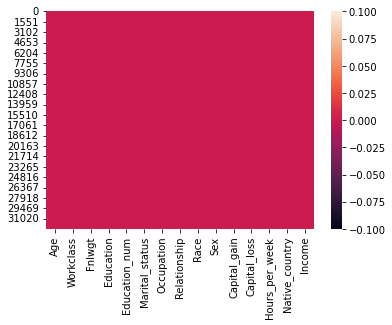

In [8]:
# Checking null values using graph
sns.heatmap(census.isnull())

No null values in our dataset.

In [9]:
census["Workclass"].value_counts()

# The number of people present in each workclass
# There is "?" workclass given which means the workclass is unknown according to the data value

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

<AxesSubplot:xlabel='Workclass', ylabel='count'>

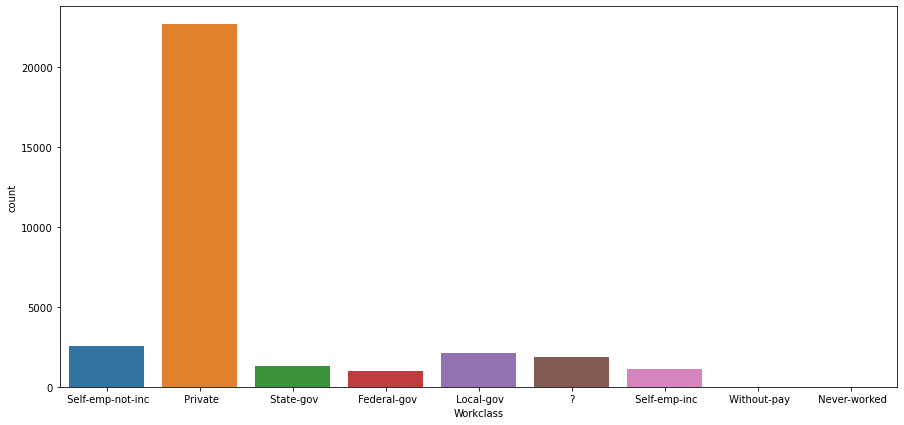

In [10]:
plt.figure(figsize=(15,7))
sns.countplot(census["Workclass"])

# Graphical representation of people present in each workclass 

Most people belong to the private working class

In [11]:
census["Education"].value_counts()

#Education of the people working in different class

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

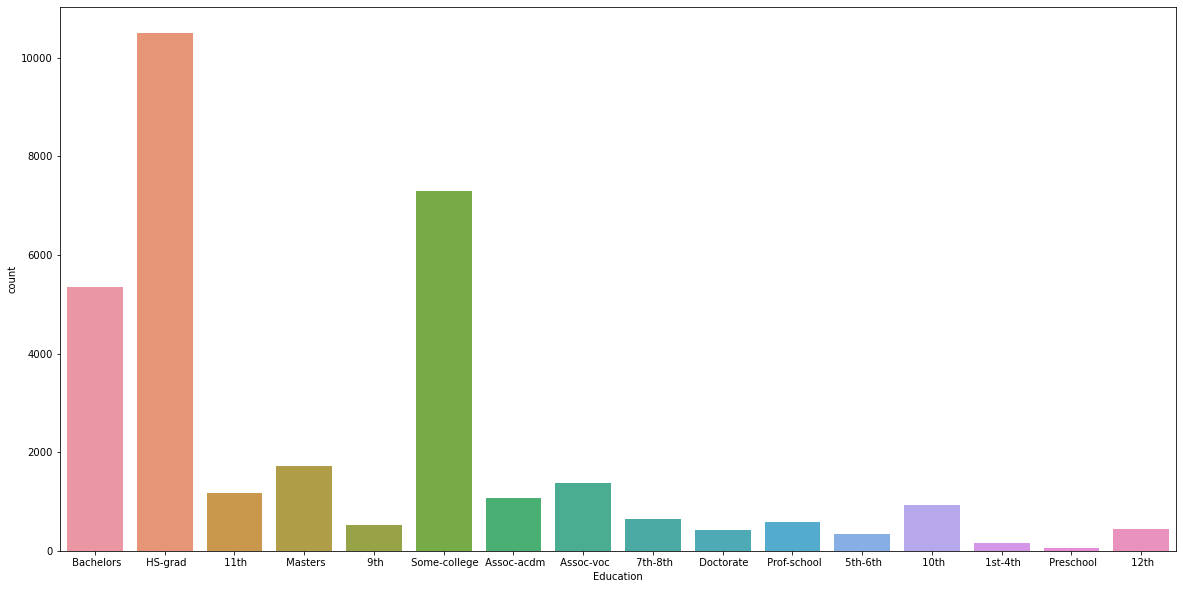

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(census["Education"])

# Displaying the Education of the people working in different class

Mostly people are from High School Graduation education background

In [13]:
census["Marital_status"].value_counts()

#Marital Status of the people working in different class

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

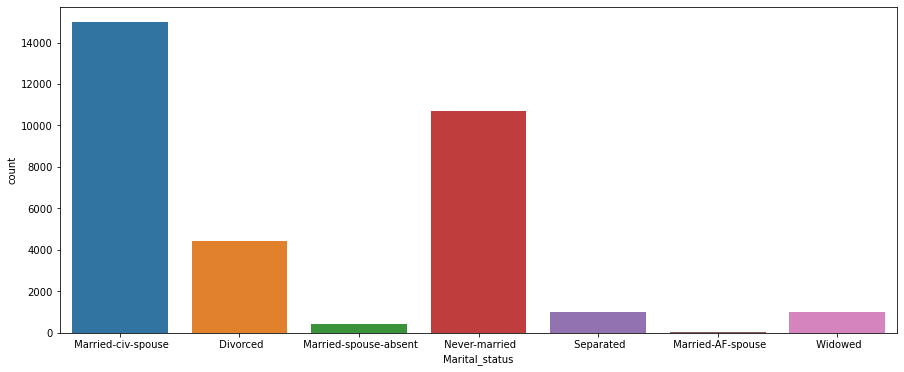

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(census["Marital_status"])

# Displaying the Marital Status of the people working in different class

Mostly people have married Civilian Spouse, while very few people have married Armed Forces spouse

In [15]:
census["Occupation"].value_counts()

#People belonging to different Occuptation

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='count'>

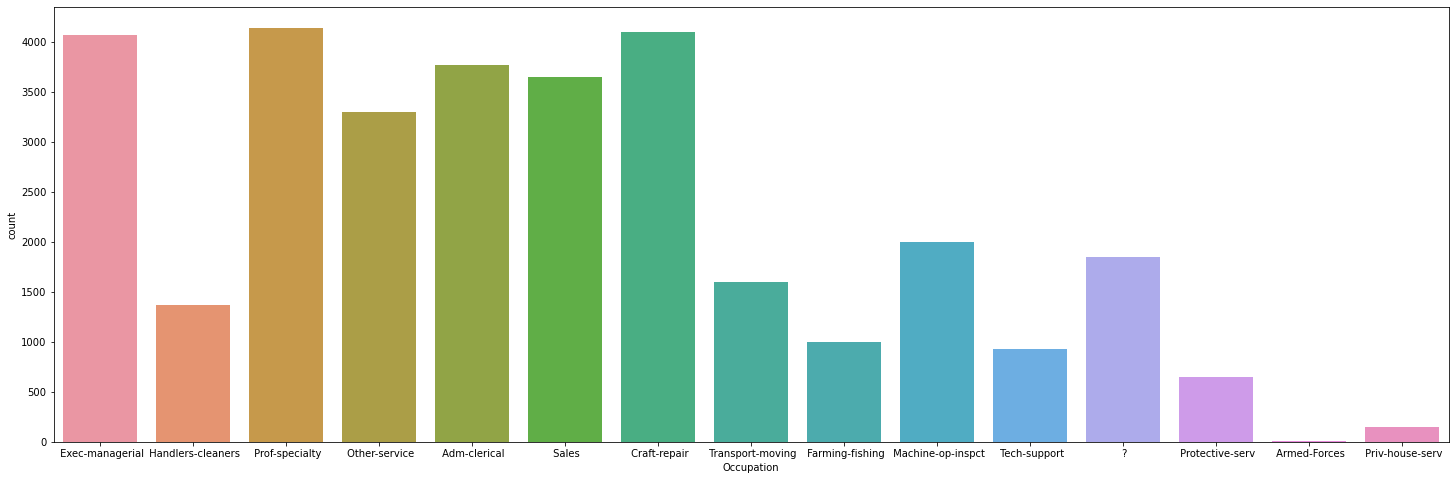

In [16]:
plt.figure(figsize=(25,8))
sns.countplot(census["Occupation"])

# Displaying the Occupation of the people working in different class


Mostly people are working as craft repair, professor and Managerial Executive.
There are some people in "?" category which means their occupation is unknown according to the data

In [17]:
census["Relationship"].value_counts()

#Relationship of the people working in different class

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

<AxesSubplot:xlabel='Relationship', ylabel='count'>

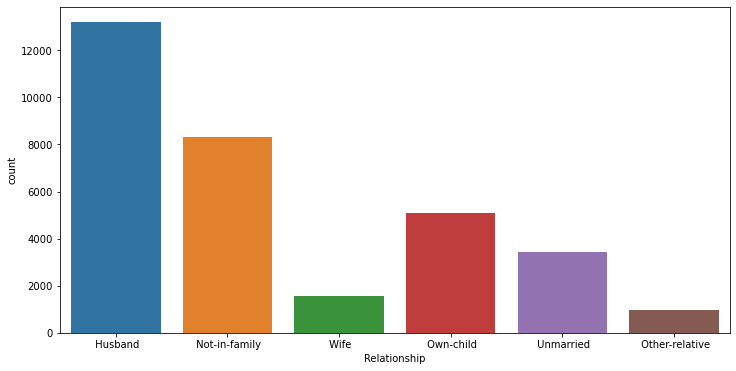

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(census["Relationship"])

# Displaying the relationship of the people working in different class


 Most people are working Husband.
Very Few people are working wife and other relative

In [19]:
census["Race"].value_counts()

# Race of the people working in different class

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

<AxesSubplot:xlabel='Race', ylabel='count'>

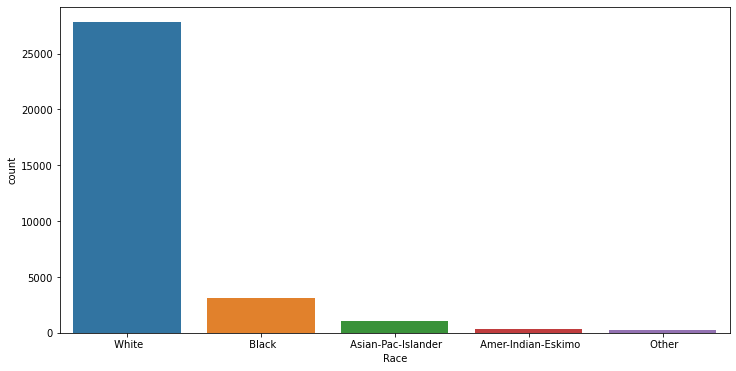

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(census["Race"])

# Displaying the race of the people working in different class


Most people in the dataset are white people while very few are of other races

In [21]:
census["Sex"].value_counts()

#Gender of the people working in different class

 Male      21789
 Female    10771
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

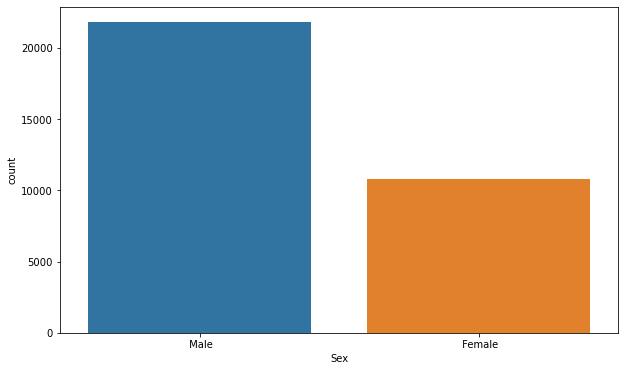

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(census["Sex"])

# Displaying the Gender of the people working in different class

As can be seen there are above 2 times male people working over working female

In [23]:
census["Native_country"].value_counts()

# Displaying Working people native countries


 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Most of the people belong to United States while few belong to Mexico and "?" represents unknown native country.
Very few people are from other countries all over the world

<AxesSubplot:xlabel='Native_country', ylabel='count'>

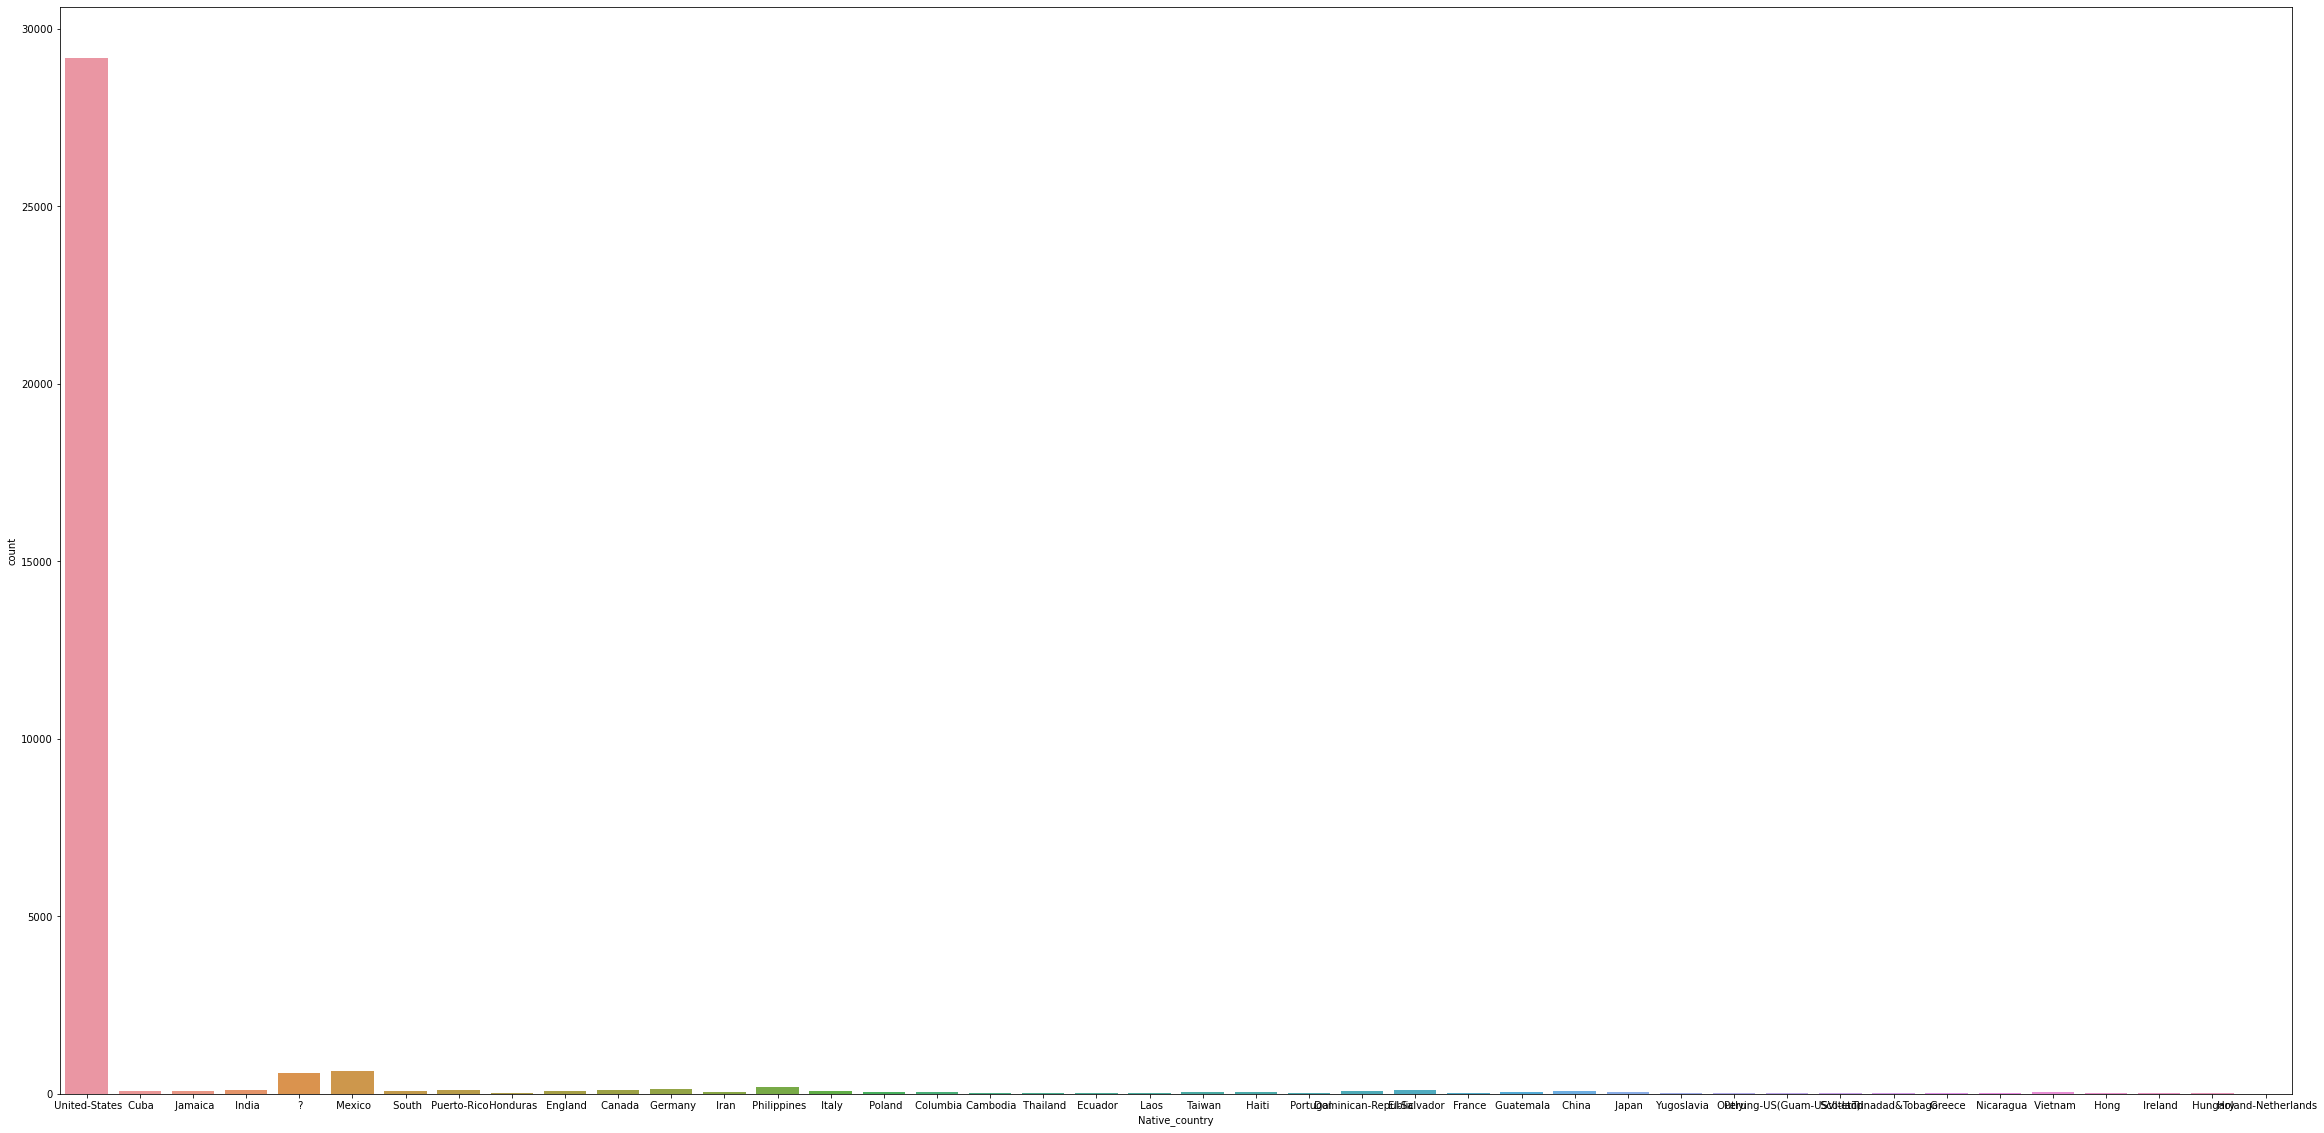

In [24]:
plt.figure(figsize=(40,20))
sns.countplot(census["Native_country"])

# Displaying the Native country of the people working in different class
# Most People are the natives of United States


In [25]:
census["Income"].value_counts()

# Showing the Income of the people working in different classes

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

Most people have Income equal to or less than $50

<AxesSubplot:xlabel='Income', ylabel='count'>

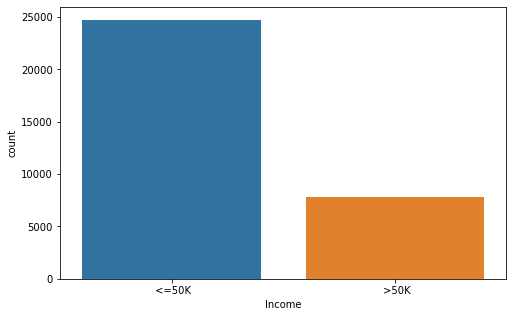

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(census["Income"])

# Most people have Income equal to or less than $50K

<AxesSubplot:xlabel='Income', ylabel='count'>

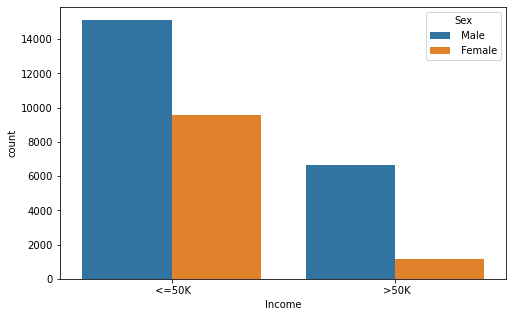

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(census["Income"],hue=census["Sex"])

# Displaying the income category with respect to gender


It is clearly shown that in both the categories there are many more males as compared to females But Most people have Income equal to or less than $50K

<AxesSubplot:xlabel='Race', ylabel='count'>

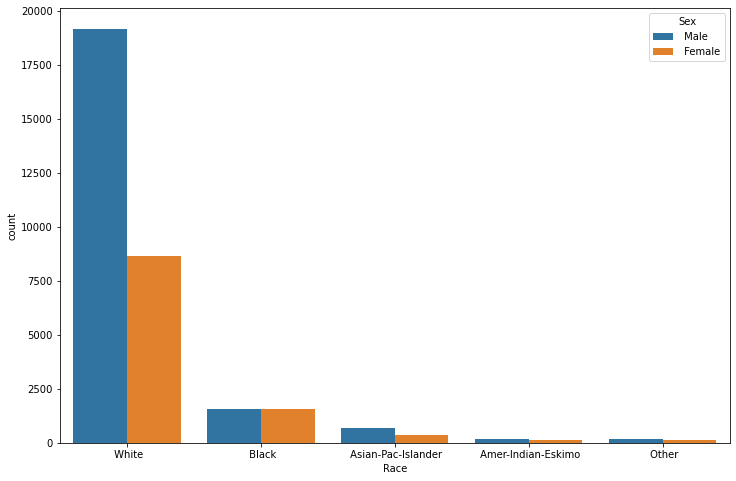

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(census["Race"],hue=census["Sex"])

# Displaying the Race of working people with respect to their gender
# It can be seen that equal number of male and female work in black race
# In White race there is huge difference between working male and female

<AxesSubplot:xlabel='Sex', ylabel='Hours_per_week'>

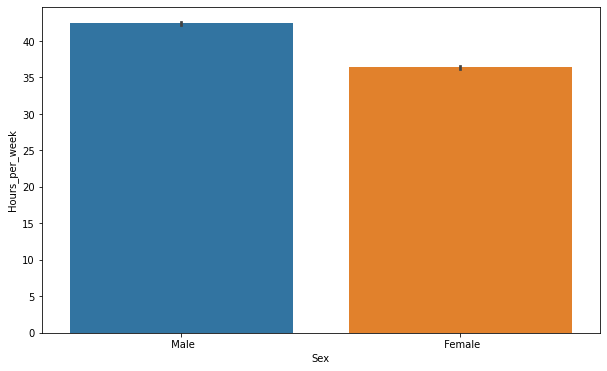

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(x=census["Sex"],y=census["Hours_per_week"])

# Graphical Representation showing Males work more hours per week as compared to females

<AxesSubplot:xlabel='Sex', ylabel='Capital_gain'>

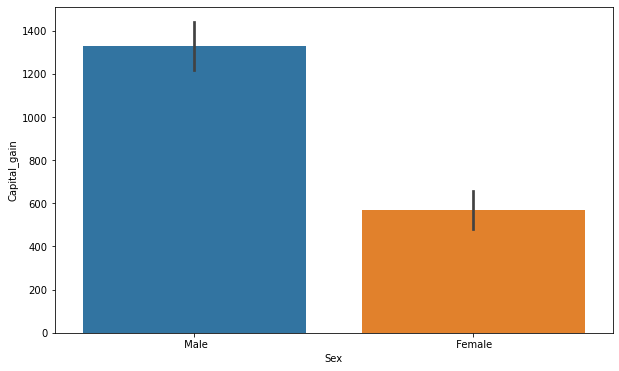

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(x=census["Sex"],y=census["Capital_gain"])

# Graphical Representation shows that males have more capital gains as compared to females


This means males have higher returns on investments

<AxesSubplot:xlabel='Sex', ylabel='Capital_loss'>

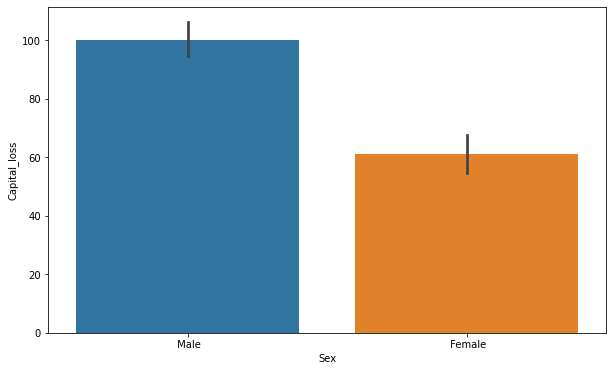

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x=census["Sex"],y=census["Capital_loss"])

# Graphical Representation shows that males have more capital loss as compared to females

This means males have more capital loss as compared to females

# Descriptive Analysis :-

In [32]:
# Now checking  features description.
census.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Key Observations :-

Age have difference in mean and median and also 100th percentile also show presence of outliers in feature.

Capital_gain and Captila_loss are not having normally distributed data and also high standard deviation is present means data is widely spreaded.

# Checking Distribution of Dataset :-

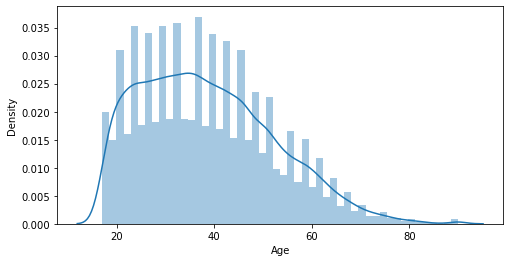

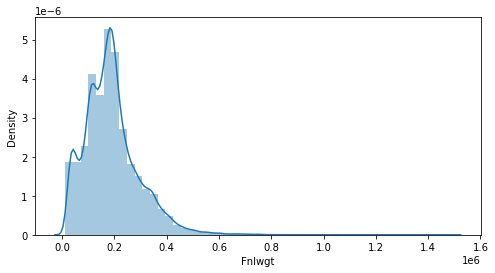

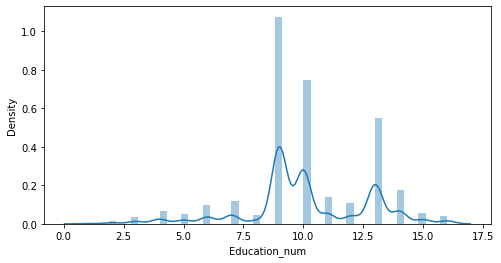

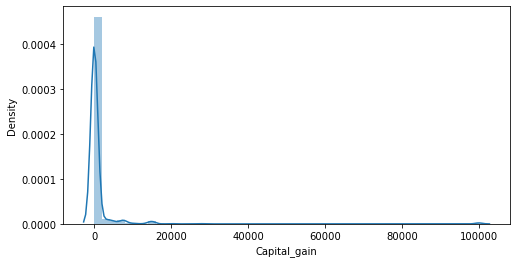

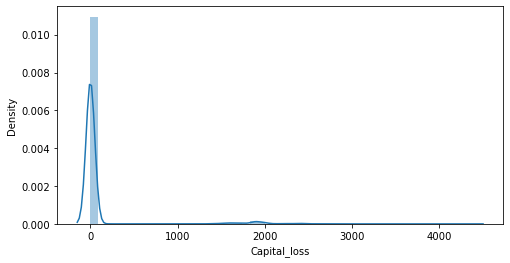

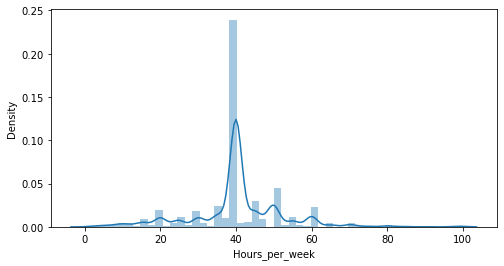

In [33]:
for i in census.columns:
    if census[i].dtypes!='object':
        plt.figure(figsize=(8,4))
        sns.distplot(census[i])

The Capital_loss and Captial_gain columns has a very high skewness towards right

The Age column has a little skewness towards right

# Checking relation between Features and Label :-

<AxesSubplot:xlabel='Capital_gain', ylabel='Capital_loss'>

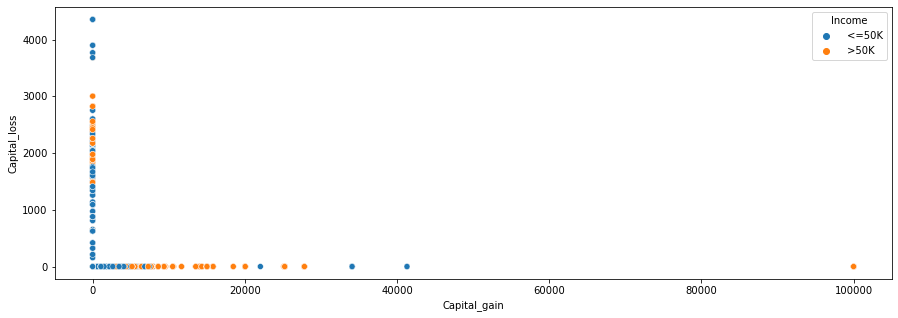

In [34]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Capital_gain' ,y='Capital_loss',hue='Income',data=census)

<AxesSubplot:xlabel='Education', ylabel='Education_num'>

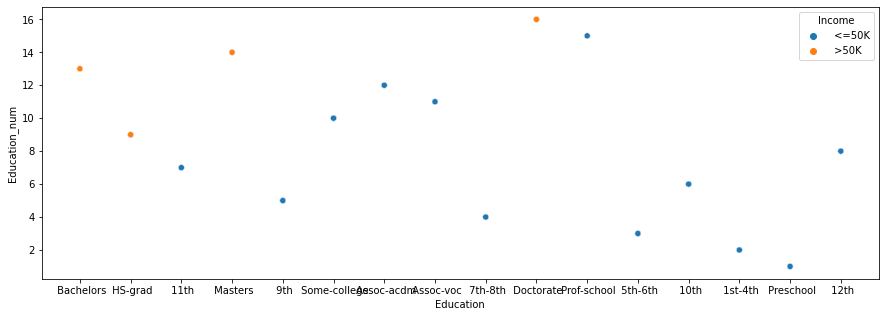

In [35]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Education',y='Education_num',hue='Income',data=census)

From this we can conclude that Bachelors,HS-grad, Masters and Doctorate are education qualification which earns income greater than 50k. While all other education qualification earns less than 50k. Lets sort the data.

<AxesSubplot:xlabel='Workclass', ylabel='Hours_per_week'>

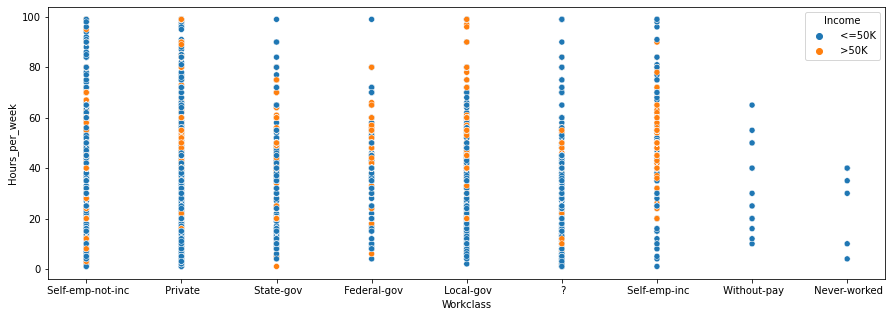

In [36]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Workclass',y='Hours_per_week',hue='Income',data=census)

# Label Encoding:-

In [37]:
census.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [38]:
from sklearn.preprocessing import LabelEncoder

# Importing the Label Encoder from Sklearn Library

In [39]:
le=LabelEncoder()

In [40]:
for i in census.columns:
    if census[i].dtypes=="object":
        census[i]=le.fit_transform(census[i].values.reshape(-1,1))
        
# Running a for loop to give numeric values to strings using the Label Encoder in census dataset

In [41]:

census

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


# Checking Correlation:-

In [42]:
census_corr=census.corr()
census_corr

# Showing the Correlation between all the independent variable and target variable

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


<AxesSubplot:>

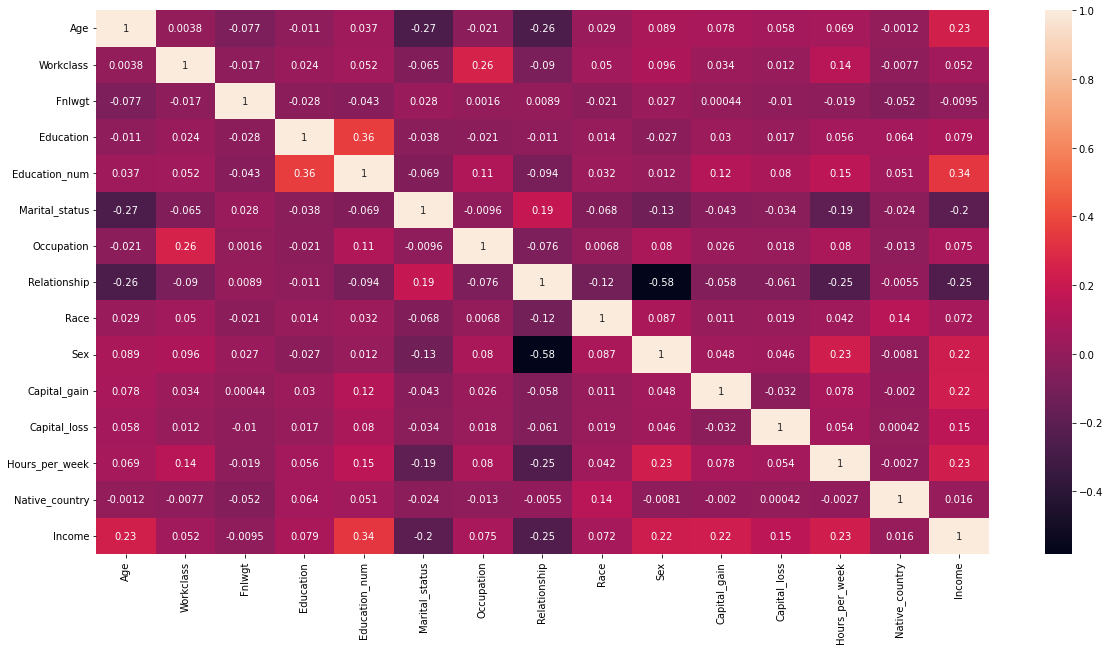

In [43]:
plt.figure(figsize=(20,10))
sns.heatmap(census_corr,annot=True,annot_kws={'size':10})

# Graphical Representation showing the Correlation between all the independent variable and target variable



 We can see that Fnlwgt and Naitive country almost has 0 correlation with the target variable income

In [44]:
corr=census.corr()
corr['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Education         0.079311
Occupation        0.075448
Race              0.071853
Workclass         0.051645
Native_country    0.015845
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

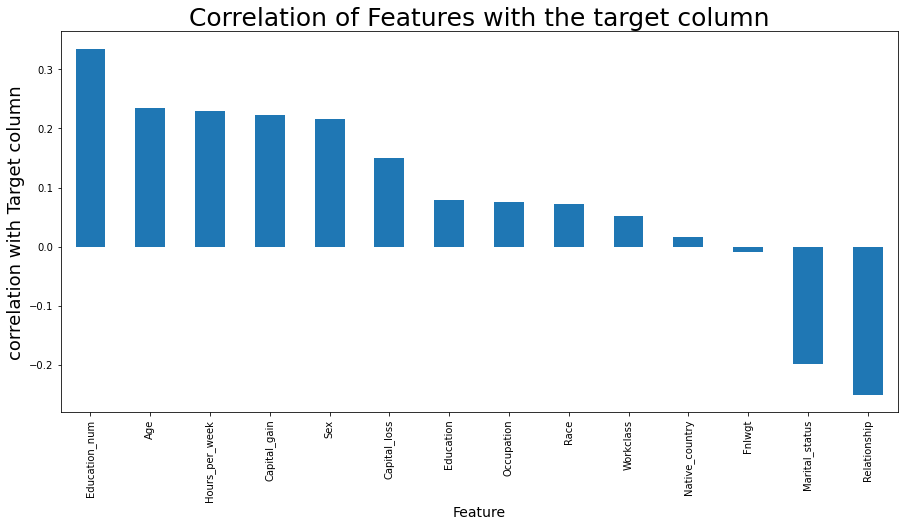

In [45]:
plt.figure(figsize=(15,7))
census.corr()["Income"].sort_values(ascending=False).drop(["Income"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Features with the target column", fontsize=25)
plt.show()

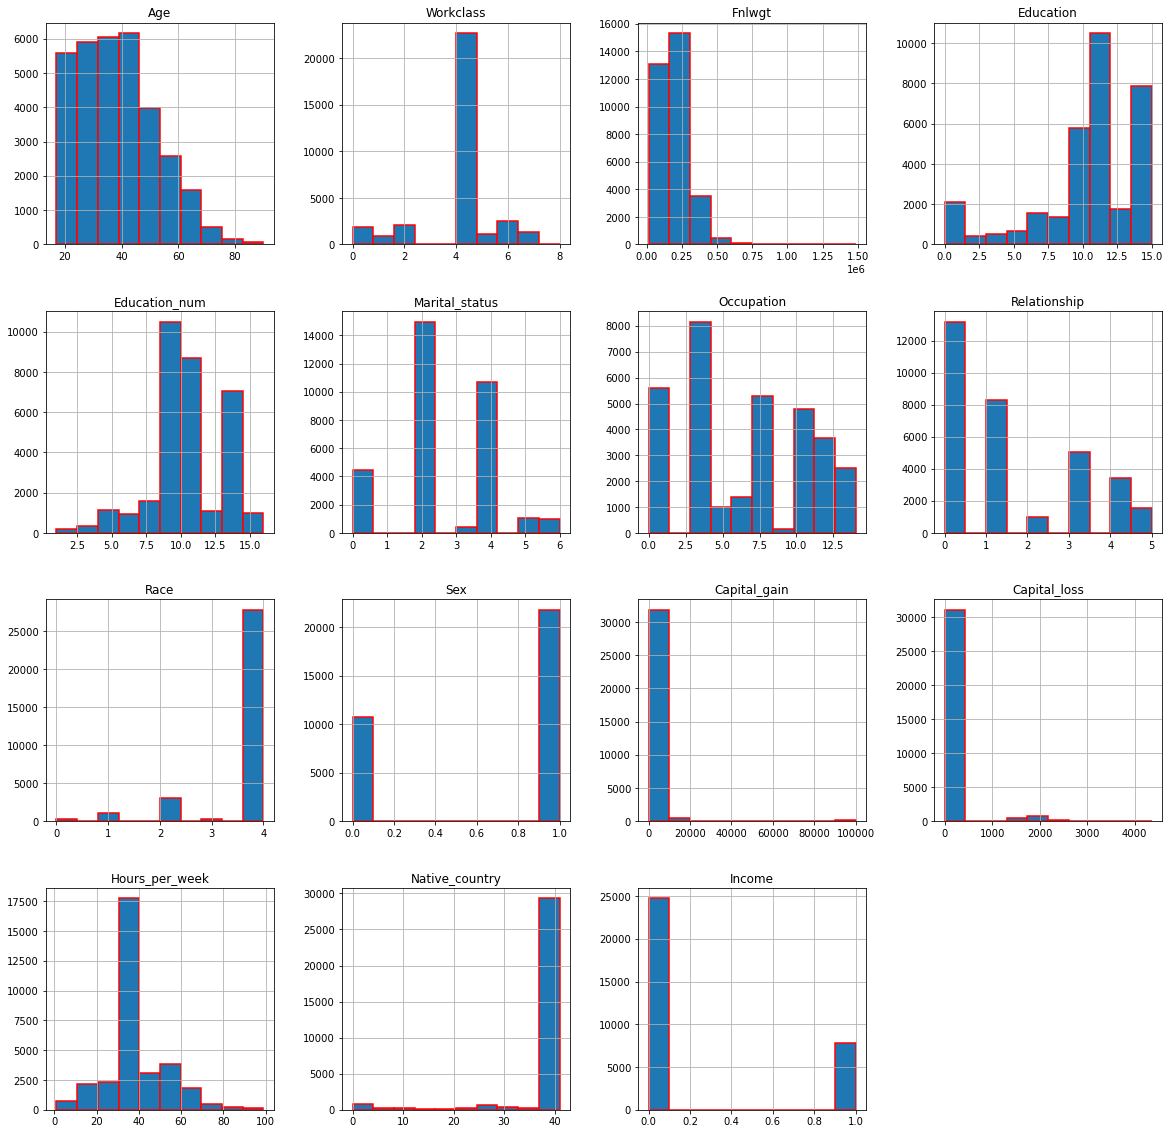

In [46]:
census.hist(layout=(4,4),edgecolor="red",linewidth= 1.5,figsize=(20,20),bins=10,grid=True)
plt.show()

# Multivariate Analysis:-

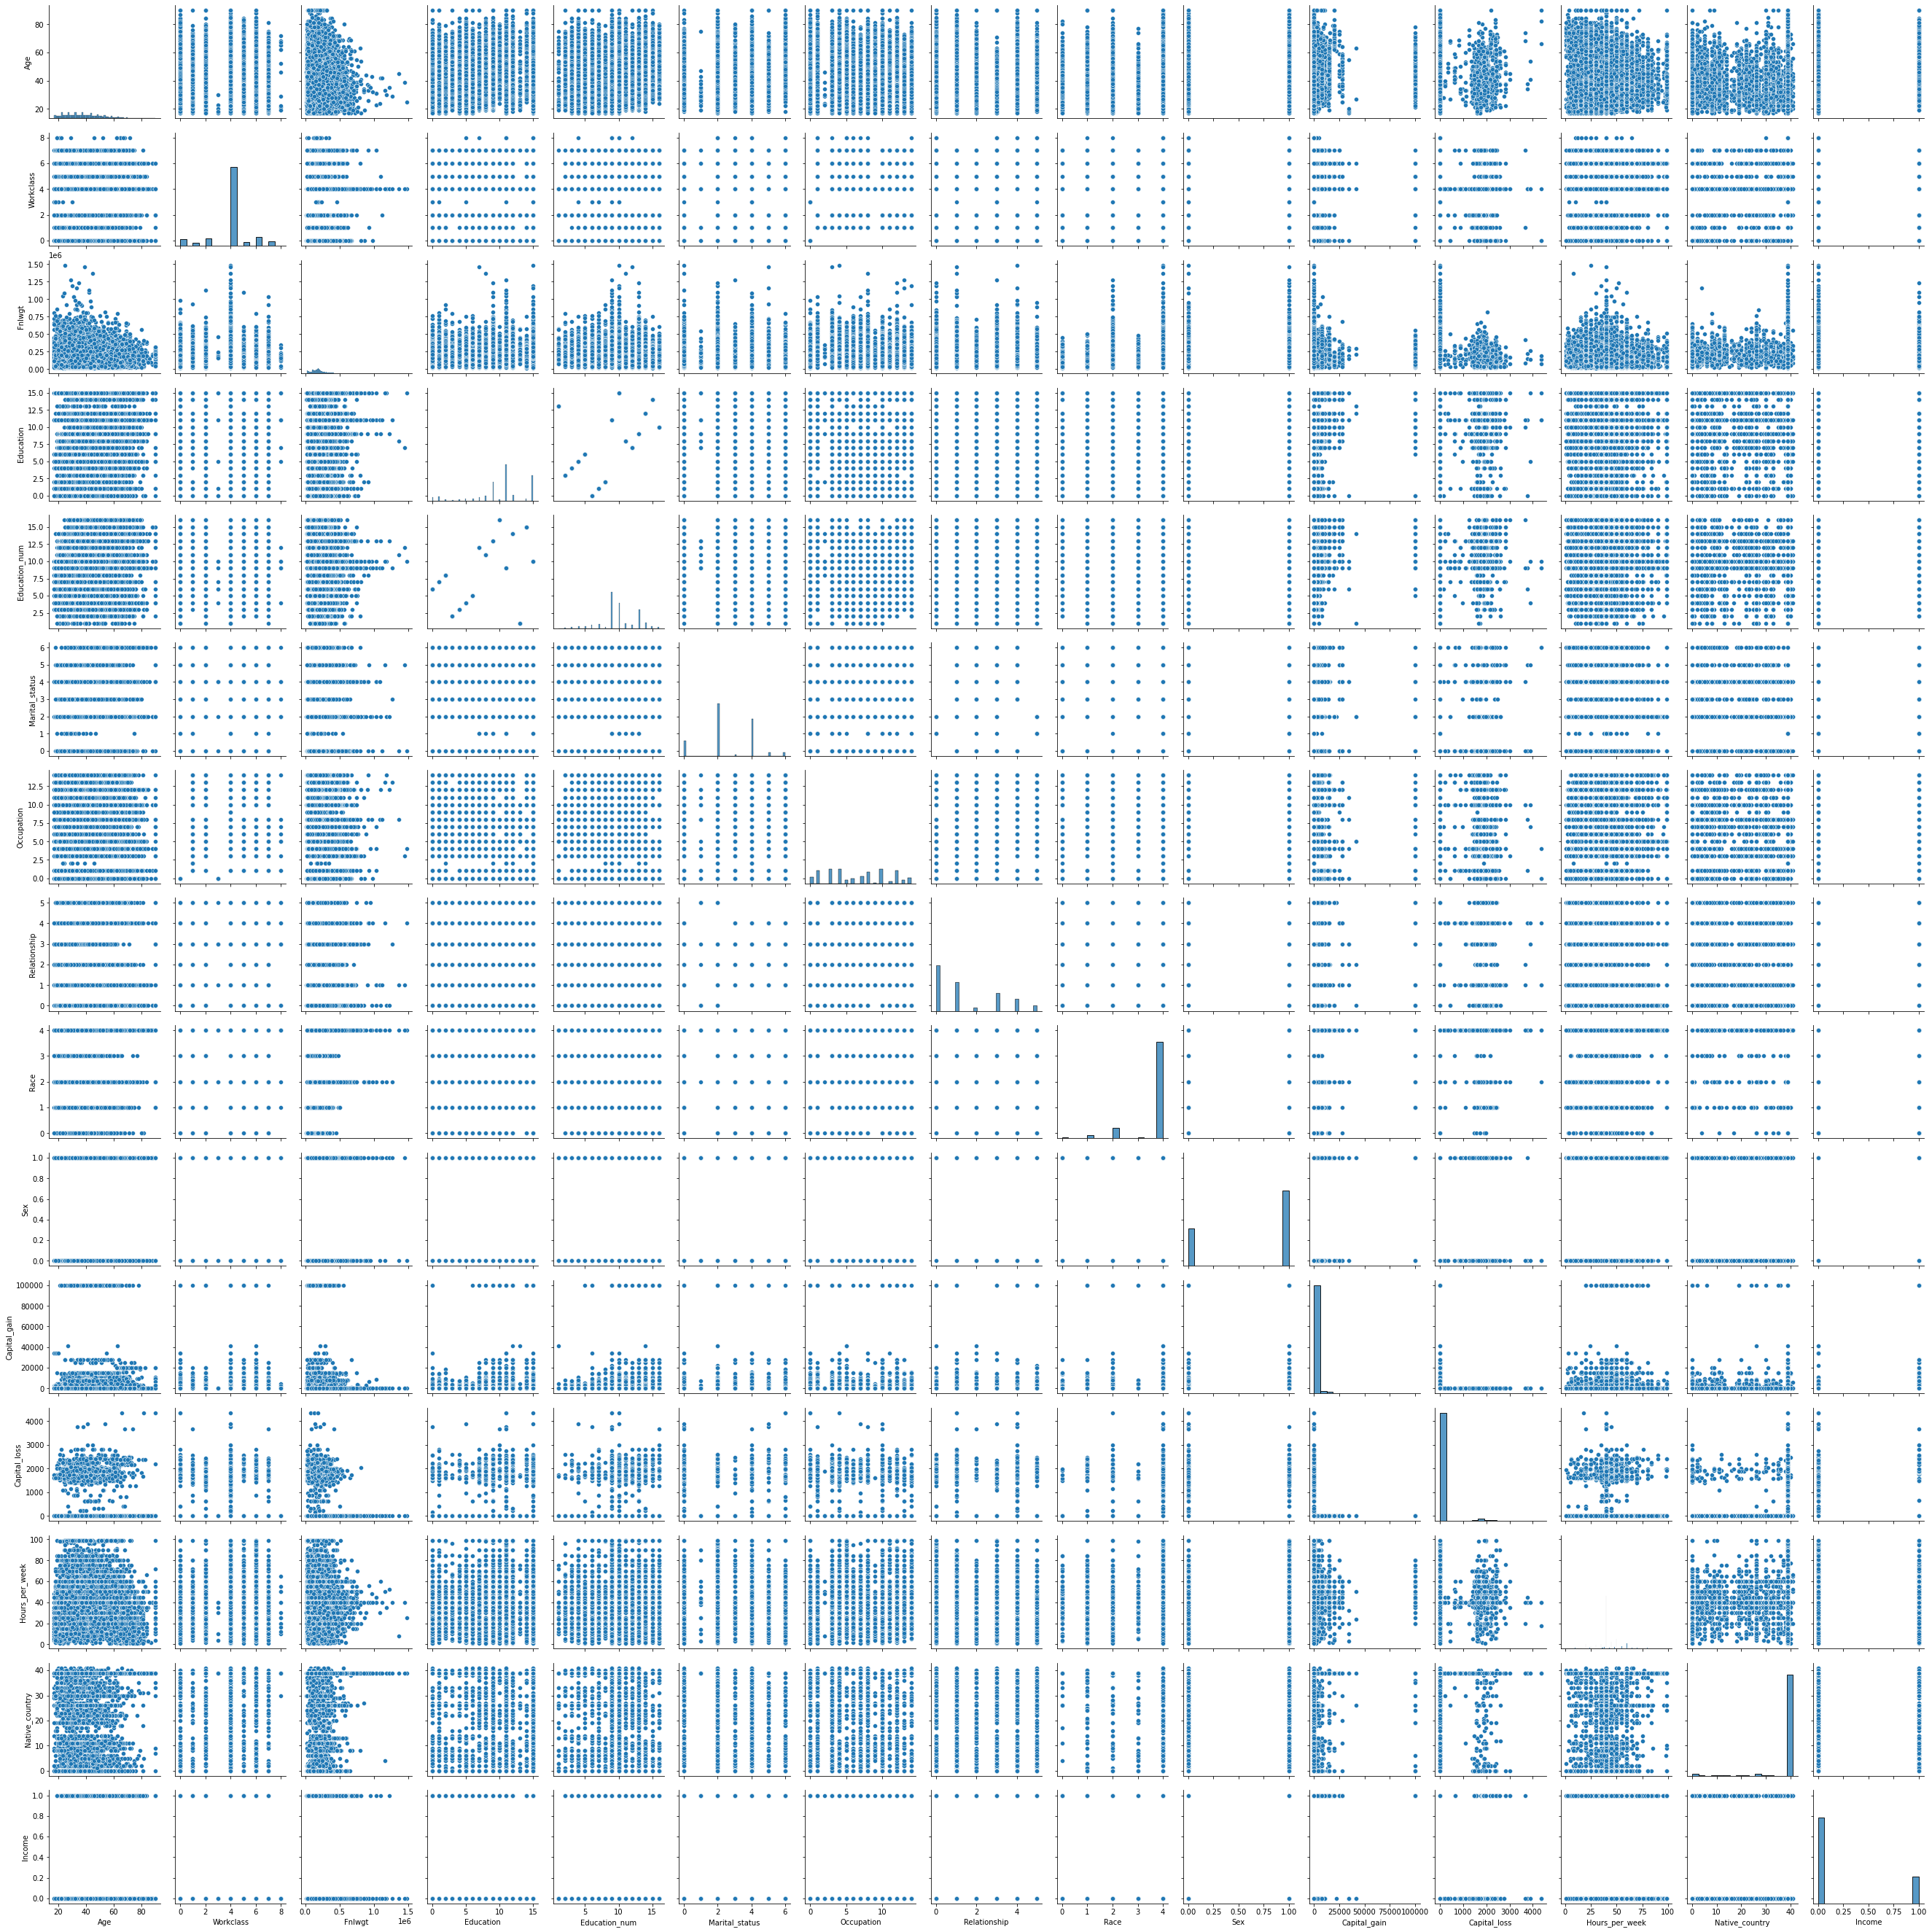

In [47]:
sns.pairplot(census)

# It is showing the correlation of each variable with others in graphical presentation

# Checking Skewness:-

In [48]:
census.skew()

# Checking the skewness of the census dataset 

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

We can see that many numeric columns have high skewness which needs to be treated such as capital gain, capital loss etc

# Checking Outliers:-

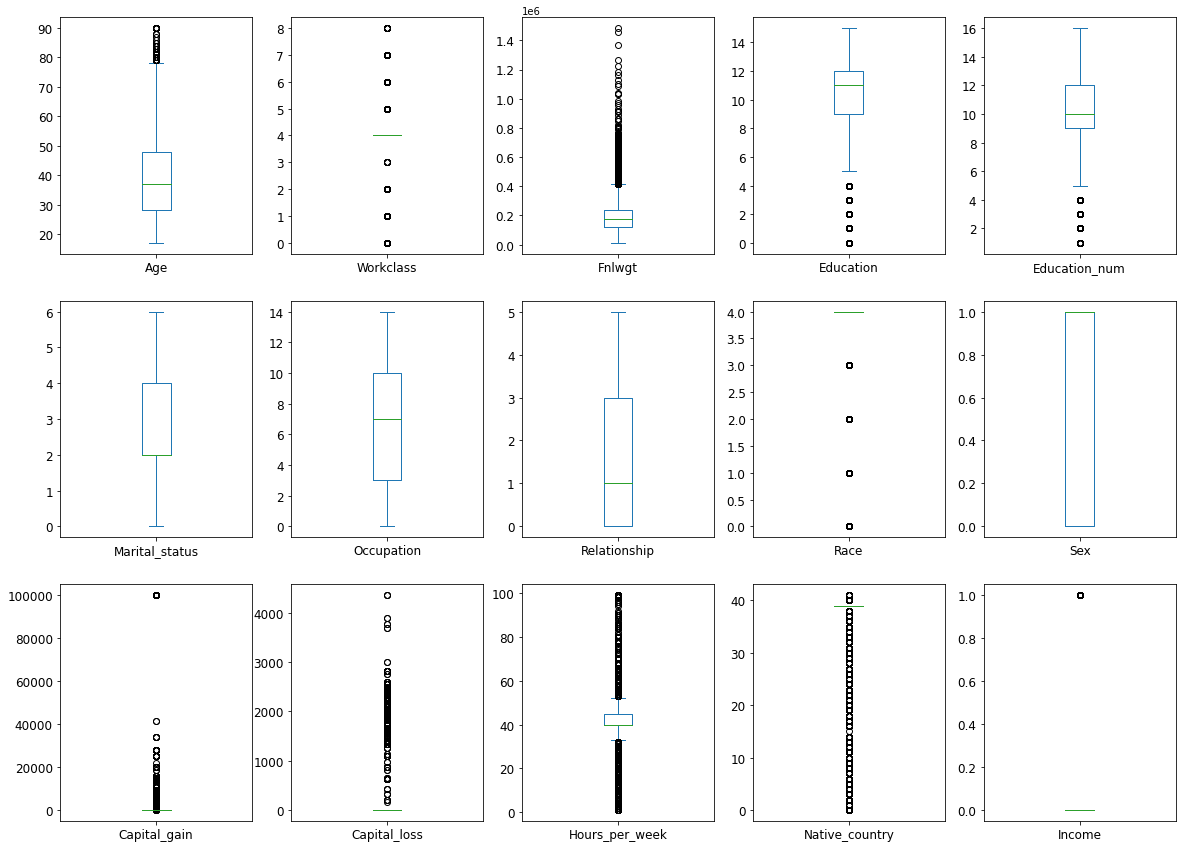

In [49]:
census.plot(kind="box", subplots=True, layout=(4,5), figsize=(20,20), fontsize=12)
plt.show()


The boxplot shows the presence of many outliers in the numerical datatype columns such as capital gain & loss etc

# Data Cleaning:-

In [50]:
census

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [51]:
census.drop(columns=["Fnlwgt","Native_country"],inplace=True)

# Dropping all the columns that do not correlate with the target variable income to increase model performance

# Outlier Treatment:-

In [52]:
census.columns

Index(['Age', 'Workclass', 'Education', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Income'],
      dtype='object')

In [53]:
from scipy.stats import zscore

# Importing zscore function to detect outliers from scipy Library

In [54]:
z=np.abs(zscore(census[['Age','Education_num','Capital_gain','Capital_loss','Hours_per_week' ]]))
z

# Taking absolute of all the z score values so that negative values also become positive ones

,Age,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,0.837097,1.134779,0.145914,0.216663,2.222120
1,0.042640,0.420027,0.145914,0.216663,0.035430
2,1.057031,1.197429,0.145914,0.216663,0.035430
3,0.775755,1.134779,0.145914,0.216663,0.035430
4,0.115952,1.523480,0.145914,0.216663,0.035430
...,...,...,...,...,...
32555,0.849066,0.746077,0.145914,0.216663,0.197407
32556,0.103982,0.420027,0.145914,0.216663,0.035430
32557,1.423589,0.420027,0.145914,0.216663,0.035430
32558,1.215624,0.420027,0.145914,0.216663,1.655200


In [55]:
print(np.where(z>3))

# Printing all the integer locations of all the values where the z score value is above +3 Stanard Deviation
# These points determine the outliers present in the dataset

(array([    9,    22,    27, ..., 32524, 32524, 32530], dtype=int64), array([4, 3, 4, ..., 0, 4, 4], dtype=int64))


In [56]:
census_new=census[(z<3).all(axis=1)]
census_new

# Taking all the values which are under +3 Standard Deviation into new Data Frame "census_new"
# This dataset contains all the values and outliers are removed

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,6,9,13,2,4,0,4,1,0,0,13,0
1,38,4,11,9,0,6,1,4,1,0,0,40,0
2,53,4,1,7,2,6,0,2,1,0,0,40,0
3,28,4,9,13,2,10,5,2,0,0,0,40,0
4,37,4,12,14,2,4,5,4,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,7,12,2,13,5,4,0,0,0,38,0
32556,40,4,11,9,2,7,0,4,1,0,0,40,1
32557,58,4,11,9,6,1,4,4,0,0,0,40,0
32558,22,4,11,9,4,1,3,4,1,0,0,20,0


In [57]:
census.shape,census_new.shape

((32560, 13), (30150, 13))

In [58]:
data_loss=((32560-30150)/32560)*100
data_loss

# Checking the Data loss which is 7.40%, Since the Data loss is very high we will not remove outliers

7.401719901719901

# Skewness Treatment :-

In [59]:
census.skew()

# Checking the Skewness of the Dataset

Age                0.558738
Workclass         -0.752280
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Income             1.212383
dtype: float64

In [60]:
from sklearn.preprocessing import power_transform

# Importing power transform function from Sklearn Library 

In [61]:
census[['Age','Education_num','Capital_gain','Capital_loss','Hours_per_week' ]]=power_transform(census[['Age','Education_num','Capital_gain','Capital_loss','Hours_per_week' ]])

In [62]:
census.skew()

Age              -0.013897
Workclass        -0.752280
Education        -0.934063
Education_num     0.023885
Marital_status   -0.013448
Occupation        0.114540
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.229556
Income            1.212383
dtype: float64

# Model Building using Logistic Regression:-

In [63]:
x=census_new.drop(['Income'],axis=1)
y=census_new['Income']

Finding Best Random State:-

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Importing the Algorithm and Evolution Matrix to perform Classification

In [65]:
MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr_train=lr.predict(x_train)
    predlr_test=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)


Best Accuracy is  0.815070310427169 on Random State  485


In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=485)

In [67]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

# Training the Logistic Regression Model

LogisticRegression()

In [68]:
lr_pred=lr.predict(x_test)
lr_pred

# The Logistic Regression Model predicting values based on training

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
accuracy_score(y_test,lr_pred)

0.815070310427169

In [70]:

print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))

# Accuracy Score and Evolution Matrix of Logistic Regression Model

[[5652  255]
 [1139  492]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5907
           1       0.66      0.30      0.41      1631

    accuracy                           0.82      7538
   macro avg       0.75      0.63      0.65      7538
weighted avg       0.79      0.82      0.79      7538



In [71]:
from sklearn.metrics import roc_curve,auc,roc_auc_score

In [72]:
auc_score=roc_auc_score(y_test,lr_pred)
auc_score

0.6292431523687667

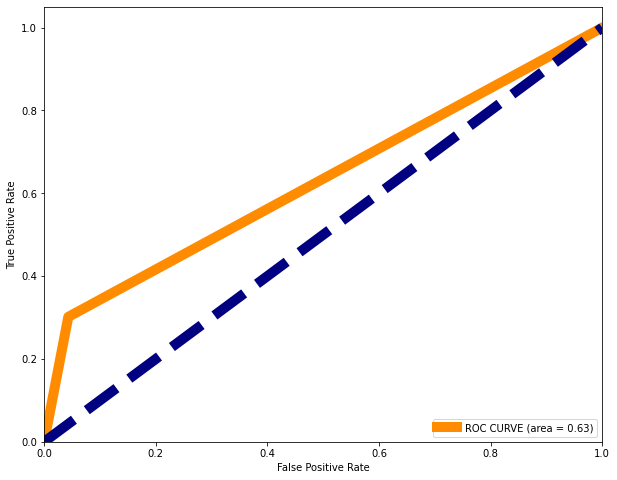

In [73]:
fpr,tpr,thresholds=roc_curve(y_test,lr_pred)
roc_auc =auc(fpr,tpr)

plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC CURVE (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Model Building using other Classifiers:-

# Decision Tree Classifier:-

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    preddtc_train=dtc.predict(x_train)
    preddtc_test=dtc.predict(x_test)
    acc=accuracy_score(y_test,preddtc_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)

# Finding the Best Random State with maximum Accuracy Score

Best Accuracy is  0.8227646590607588 on Random State  15


In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=15)

In [77]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

# Training the Decision Tree Classifier Model

DecisionTreeClassifier()

In [78]:
dtc_pred=dtc.predict(x_test)
dtc_pred

# The Decision Tree Classifier Model is predicting values based on training

array([0, 1, 0, ..., 0, 0, 0])

In [79]:
print(accuracy_score(y_test,dtc_pred))
print(confusion_matrix(y_test,dtc_pred))
print(classification_report(y_test,dtc_pred))

# Accuracy Score and Evolution Matrix of Decision Tree Classifier Model

0.8230299814274343
[[5221  671]
 [ 663  983]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5892
           1       0.59      0.60      0.60      1646

    accuracy                           0.82      7538
   macro avg       0.74      0.74      0.74      7538
weighted avg       0.82      0.82      0.82      7538



In [80]:
auc_score=roc_auc_score(y_test,dtc_pred)
auc_score

0.7416610573968534

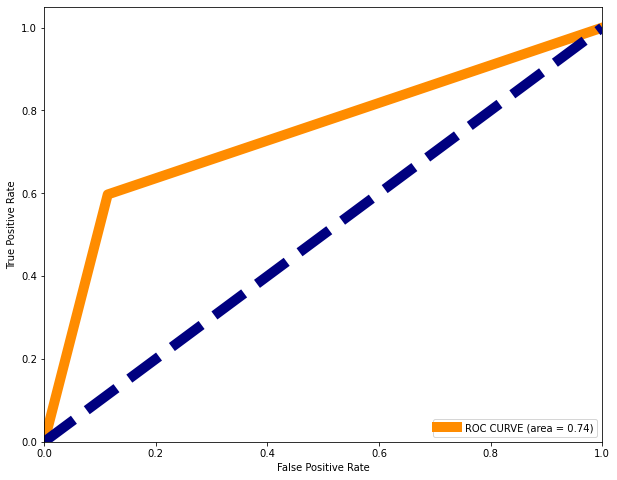

In [81]:
fpr,tpr,thresholds=roc_curve(y_test,dtc_pred)
roc_auc =auc(fpr,tpr)

plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC CURVE (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Random Forest Classifier:-

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    predrfc_train=rfc.predict(x_train)
    predrfc_test=rfc.predict(x_test)
    acc=accuracy_score(y_test,predrfc_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)

# Finding the Best Random State with maximum Accuracy Score

Best Accuracy is  0.8593791456619793 on Random State  394


In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=394)

In [85]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

# Training the Random Forest Classifier Model

RandomForestClassifier()

In [86]:
rfc_pred=rfc.predict(x_test)
rfc_pred

# The Random Forest Classifier Model is predicting values based on training

array([1, 0, 0, ..., 0, 1, 0])

In [87]:
print(accuracy_score(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

# Accuracy Score and Evolution Matrix of Random Classifier Model

0.8580525338286018
[[5488  397]
 [ 673  980]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5885
           1       0.71      0.59      0.65      1653

    accuracy                           0.86      7538
   macro avg       0.80      0.76      0.78      7538
weighted avg       0.85      0.86      0.85      7538



In [88]:
auc_score=roc_auc_score(y_test,rfc_pred)
auc_score

0.762700910422131

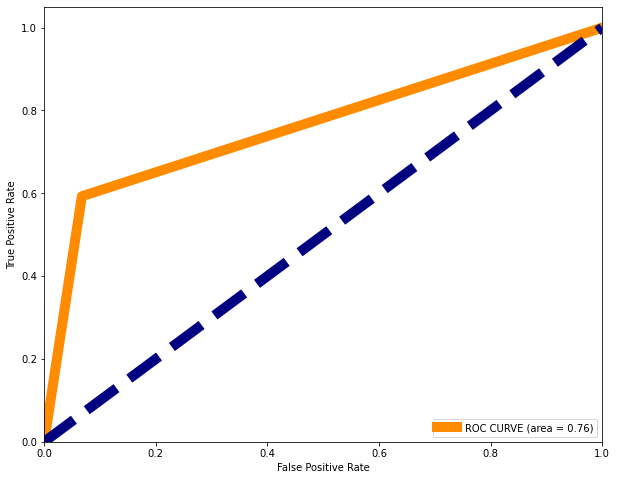

In [89]:
fpr,tpr,thresholds=roc_curve(y_test,rfc_pred)
roc_auc =auc(fpr,tpr)

plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC CURVE (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# K Neighbors Classifier:-

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    predknn_train=knn.predict(x_train)
    predknn_test=knn.predict(x_test)
    acc=accuracy_score(y_test,predknn_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)

# Finding the Best Random State with maximum Accuracy Score

Best Accuracy is  0.8458477049615283 on Random State  353


In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=353)

In [93]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

# Training the K Neighbors Classifier Model

KNeighborsClassifier()

In [94]:
knn_pred=knn.predict(x_test)
knn_pred

# The K Neighbors Classifier Model is predicting values based on training

array([0, 0, 0, ..., 0, 0, 0])

In [95]:

print(accuracy_score(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

# Accuracy Score and Evolution Matrix of K Neighbors Classifier Model

0.8458477049615283
[[5355  487]
 [ 675 1021]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      5842
           1       0.68      0.60      0.64      1696

    accuracy                           0.85      7538
   macro avg       0.78      0.76      0.77      7538
weighted avg       0.84      0.85      0.84      7538



In [96]:
auc_score=roc_auc_score(y_test,knn_pred)
auc_score

0.7593214273026168

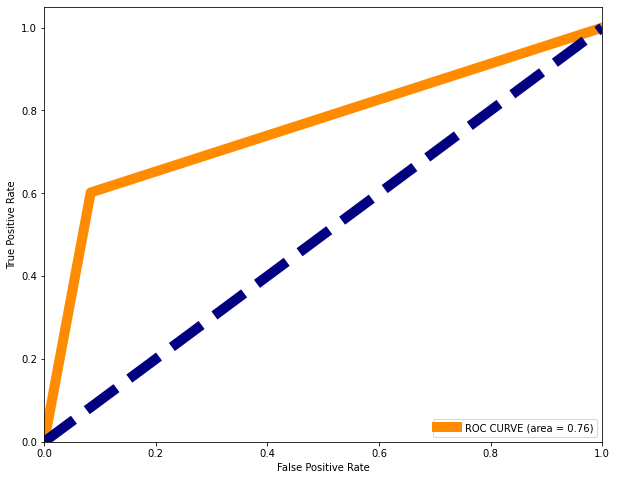

In [97]:
fpr,tpr,thresholds=roc_curve(y_test,knn_pred)
roc_auc =auc(fpr,tpr)

plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC CURVE (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Extra Trees Classifier:-

In [98]:
from sklearn.ensemble import ExtraTreesClassifier

# Importing the Extra Trees Classifier Model

In [99]:
MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    etc=ExtraTreesClassifier()
    etc.fit(x_train,y_train)
    pred_etc_train=etc.predict(x_train)
    pred_etc_test=etc.predict(x_test)
    acc=accuracy_score(y_test,pred_etc_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)

Best Accuracy is  0.8482356062616079 on Random State  154


In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=154)

In [101]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)

# Training the Extra Trees Classifier Model

ExtraTreesClassifier()

In [102]:
etc.score(x_train,y_train)

# Score of the Extra Trees Classifier Model

0.9747921457633115

In [103]:
etc_pred=etc.predict(x_test)
etc_pred

# The Extra Trees Classifier Model is predicting the values based on training 

array([0, 0, 0, ..., 0, 0, 0])

In [104]:
print(accuracy_score(y_test,etc_pred))
print(confusion_matrix(y_test,etc_pred))
print(classification_report(y_test,etc_pred))

# Evolution Matrix of the Extra Trees Classifier Algorithm

0.8466436720615548
[[5425  486]
 [ 670  957]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      5911
           1       0.66      0.59      0.62      1627

    accuracy                           0.85      7538
   macro avg       0.78      0.75      0.76      7538
weighted avg       0.84      0.85      0.84      7538



In [105]:
auc_score=roc_auc_score(y_test,etc_pred)
auc_score

0.752989774463391

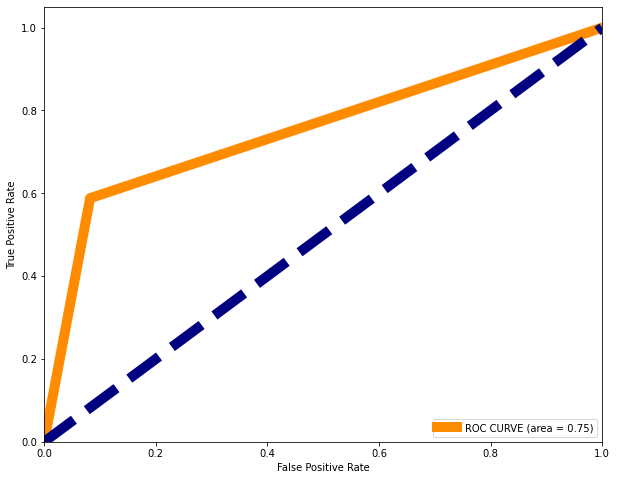

In [106]:
fpr,tpr,thresholds=roc_curve(y_test,etc_pred)
roc_auc =auc(fpr,tpr)

plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC CURVE (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Cross Validation:-

In [107]:
from sklearn.model_selection import cross_val_score

# Importing the Cross Validation Score function from sklearn Library

In [108]:
scr1=cross_val_score(lr, x, y, cv=5)
scr1

array([0.80547264, 0.80597015, 0.8106136 , 0.79701493, 0.81111111])

In [109]:
print("The Cross Validation Score of Logistic Regression is :", scr1.mean())

The Cross Validation Score of Logistic Regression is : 0.8060364842454396


In [110]:
scr2=cross_val_score(dtc, x, y, cv=5)
scr2

array([0.80580431, 0.80746269, 0.81044776, 0.80895522, 0.81343284])

In [111]:
print("The Cross Validation Score of Decision Tree Classifier is :", scr2.mean())

The Cross Validation Score of Decision Tree Classifier is : 0.8092205638474296


In [112]:
scr3=cross_val_score(rfc, x, y, cv=5)
scr3

array([0.84245439, 0.84527363, 0.84344942, 0.85389718, 0.84975124])

In [113]:
print("The Cross Validation Score of Random Forest Classifier is :", scr3.mean())

The Cross Validation Score of Random Forest Classifier is : 0.8469651741293532


In [114]:
scr4=cross_val_score(knn, x, y, cv=5)
scr4

array([0.82835821, 0.83665008, 0.8344942 , 0.83466003, 0.83366501])

In [115]:
print("The Cross Validation Score of K Neighbors Classifier is :", scr4.mean())

The Cross Validation Score of K Neighbors Classifier is : 0.8335655058043118


In [116]:
scr5=cross_val_score(etc, x,y, cv=5)
scr5

array([0.83781095, 0.83532338, 0.8358209 , 0.84195688, 0.84112769])

In [117]:
print("Cross Validation Score of Extra Trees Classifier Model is", scr5.mean())

Cross Validation Score of Extra Trees Classifier Model is 0.8384079601990051


# Hyper Parameter Tuning:-

In [118]:
from sklearn.model_selection import GridSearchCV

# Importing the GridSearchCV to get the best parameters of the Random Forest Classifier model

In [119]:
parameter={"max_depth":np.arange(2,10), 
           "criterion":["gini","entropy"],
          "min_samples_split":np.arange(2,10),
           "min_samples_leaf":np.arange(2,10)}

# Setting the Parameters to apply to GridSearchCV to get the best parameter score

In [120]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

# Applying GridSearchCV on Random Forest Classifier with Cross Validation=5

In [121]:
GCV.fit(x_train,y_train)

# Training the GridSearchCV model

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [122]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 8}

In [123]:
final_model=RandomForestClassifier(criterion="gini", max_depth=9, min_samples_leaf=3,min_samples_split=8)
final_model.fit(x_train,y_train)
final_model_pred=final_model.predict(x_test)
acc=accuracy_score(y_test,final_model_pred)
print(acc*100)

85.87158397452906


# Saving the Random Forest Classifier Model (Serialization):-

In [124]:
import pickle
file='Census Income'
pickle.dump(rfc,open(file,'wb'))

In [125]:
load=pickle.load(open('Census Income','rb'))
result=load.score(x_test,y_test)
print(result*100)

95.10480233483682


# Conclusion

In [127]:
conclusion=pd.DataFrame([load.predict(x_test),y_test],index=["Predicted","Original"])


In [128]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,7528,7529,7530,7531,7532,7533,7534,7535,7536,7537
Predicted,1,0,0,0,1,0,0,0,0,1,...,1,1,0,0,1,0,0,0,0,0
Original,1,0,0,0,1,0,0,0,0,1,...,1,1,0,0,1,0,0,0,0,0
